# Data Preprocessing 

# Import Libraries

In [1]:
import os
import re
import shutil
import string

import numpy as np
import pandas as pd

# Download Dataset

In [2]:
!wget -c https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz -O - | tar -xz

--2021-03-26 16:45:32--  https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘STDOUT’

-                   100%[===================>]  80.23M  8.23MB/s    in 8.0s    

2021-03-26 16:45:40 (10.0 MB/s) - written to stdout [84125825/84125825]



In [3]:
dataset_dir = os.path.join('aclImdb')
train_dir = os.path.join(dataset_dir, 'train')
os.listdir(train_dir)

['urls_neg.txt',
 'labeledBow.feat',
 'unsup',
 'urls_pos.txt',
 'urls_unsup.txt',
 'pos',
 'unsupBow.feat',
 'neg']

# Data Pre-processing

## make `imdb_train.csv`, `imdb_test.csv` with both combine positive and negative reviews and `imdb_unsup.csv`.

## imdb_train.csv

In [4]:
train_pos_files = os.listdir(os.path.join(train_dir, 'pos'))
train_neg_files = os.listdir(os.path.join(train_dir, 'neg'))
print(len(train_pos_files),len(train_neg_files))

12500 12500


In [5]:
# Do preprocessing for positive review of training data
f = 'traincsv_pos.txt'
with open(f, 'a') as z:
  z.write('ID\tReview')
for file in train_pos_files:
  with open(f, 'a') as a:
    with open(os.path.join(train_dir, 'pos', file), "r") as b:
      x = b.read()
      a.write('\n'+file[0:len(file)-4]+'\t'+x)

path = '/content/traincsv_pos.txt'
df = pd.read_csv(path, sep='\t', usecols=['ID', 'Review'])
df

,ID,Review
0,6217_8,"Follow the Fleet, an RKO production in 1936, s..."
1,6231_10,"This is just a great, fun, lovely film. It cap..."
2,2420_10,"If you enjoy the subtle (yes, I said subtle) a..."
3,8848_7,I watched this film in a very strange way -- I...
4,12210_9,people claim its edited funny but they had to ...
...,...,...
12495,3828_10,"I would love to comment on this film. Alas , m..."
12496,6570_8,This film is harmless escapist fun. Something ...
12497,11849_8,If only ALL animation was this great. This fil...
12498,928_10,I had watched as much of the series as I could...


In [6]:
# Extract Star ratings from ID column and change dtype from object to int
# Extract 1 character after the under_score in ID column
df['Rating'] = df.ID.str.extract('(\_\d)',expand=False)
df['Rating'] = df.Rating.str.extract('(\d)',expand=False)
df['Rating'] = pd.to_numeric(df['Rating'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      12500 non-null  object
 1   Review  12500 non-null  object
 2   Rating  12500 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 293.1+ KB


In [8]:
# For positive review replace 1 to 10 because 1 is not possible
df['Rating'] = df['Rating'].replace({1:10})
df['Sentiment'] = 1
df.drop('ID', axis=1, inplace=True)
df

,Review,Rating,Sentiment
0,"Follow the Fleet, an RKO production in 1936, s...",8,1
1,"This is just a great, fun, lovely film. It cap...",10,1
2,"If you enjoy the subtle (yes, I said subtle) a...",10,1
3,I watched this film in a very strange way -- I...,7,1
4,people claim its edited funny but they had to ...,9,1
...,...,...,...
12495,"I would love to comment on this film. Alas , m...",10,1
12496,This film is harmless escapist fun. Something ...,8,1
12497,If only ALL animation was this great. This fil...,8,1
12498,I had watched as much of the series as I could...,10,1


In [9]:
# Do preprocessing for negative review of training data
f2 = 'traincsv_neg.txt'
with open(f2, 'a') as z:
  z.write('ID\tReview')
for file in train_neg_files:
  with open(f2, 'a') as a:
    with open(os.path.join(train_dir, 'neg', file), "r") as b:
      x = b.read()
      a.write('\n'+file[0:len(file)-4]+'\t'+x)

path2 = '/content/traincsv_neg.txt'
df2 = pd.read_csv(path2, sep='\t', usecols=['ID', 'Review'])
df2['Rating'] = df2.ID.str.extract('(\_\d)',expand=False)
df2['Rating'] = df2.Rating.str.extract('(\d)',expand=False)
df2['Rating'] = pd.to_numeric(df2['Rating'])
df2['Sentiment'] = 0
df2.drop('ID', axis=1, inplace=True)

imdb_train = pd.concat([df, df2], axis=0)
imdb_train.reset_index(drop=True, inplace = True)
imdb_train.to_csv('imdb_train.csv', index=False)

## imdb_test.csv

In [10]:
test_dir = os.path.join(dataset_dir, 'test')

In [11]:
test_pos_files = os.listdir(os.path.join(test_dir, 'pos'))
test_neg_files = os.listdir(os.path.join(test_dir, 'neg'))
print(len(test_pos_files),len(test_neg_files))

12500 12500


In [12]:
# Preprocessing of testing data
f3 = 'testcsv_pos.txt'
with open(f3, 'a') as z:
  z.write('ID\tReview')
for file in test_pos_files:
  with open(f3, 'a') as a:
    with open(os.path.join(test_dir, 'pos', file), "r") as b:
      x = b.read()
      a.write('\n'+file[0:len(file)-4]+'\t'+x)

path3 = '/content/testcsv_pos.txt'
df3 = pd.read_csv(path3, sep='\t', usecols=['ID', 'Review'])
df3['Rating'] = df3.ID.str.extract('(\_\d)',expand=False)
df3['Rating'] = df3.Rating.str.extract('(\d)',expand=False)
df3['Rating'] = pd.to_numeric(df3['Rating'])
df3['Rating'] = df3['Rating'].replace({1:10})
df3['Sentiment'] = 1
df3.drop('ID', axis=1, inplace=True)

f4 = 'testcsv_neg.txt'
with open(f4, 'a') as z:
  z.write('ID\tReview')
for file in test_neg_files:
  with open(f4, 'a') as a:
    with open(os.path.join(test_dir, 'neg', file), "r") as b:
      x = b.read()
      a.write('\n'+file[0:len(file)-4]+'\t'+x)

path4 = '/content/testcsv_neg.txt'
df4 = pd.read_csv(path4, sep='\t', usecols=['ID', 'Review'])
df4['Rating'] = df4.ID.str.extract('(\_\d)',expand=False)
df4['Rating'] = df4.Rating.str.extract('(\d)',expand=False)
df4['Rating'] = pd.to_numeric(df4['Rating'])
df4['Sentiment'] = 0
df4.drop('ID', axis=1, inplace=True)

imdb_test = pd.concat([df3, df4], axis=0)
imdb_test.reset_index(drop=True, inplace = True)
imdb_test.to_csv('imdb_test.csv', index=False)

## imdb_unsup.csv

In [13]:
train_unsup_files = os.listdir(os.path.join(train_dir, 'unsup'))

In [14]:
# Preprocessing of unlabeled data
f5 = 'traincsv_unsup.txt'
with open(f5, 'a') as z:
  z.write('Review')
for file in train_unsup_files:
  with open(f5, 'a') as a:
    with open(os.path.join(train_dir, 'unsup', file), "r") as b:
      x = b.read()
      a.write('\n'+x)

path5 = '/content/traincsv_unsup.txt'
df5 = pd.read_csv(path5, sep='\n')
df5.to_csv('imdb_unsup.csv', index=False)

In [15]:
# Remove text files, which are no longer needed. 
!rm traincsv_neg.txt
!rm traincsv_pos.txt
!rm traincsv_unsup.txt
!rm testcsv_neg.txt
!rm testcsv_pos.txt

In [16]:
remove_dir = os.path.join(train_dir, 'unsup')
shutil.rmtree(remove_dir)

In [17]:
df6 = pd.read_csv('/content/aclImdb/imdb.vocab')
df7 = pd.read_csv('/content/aclImdb/imdbEr.txt')
df8 = pd.concat([df6,df7], axis=1)
df8.columns = ['Token', 'Corr_Rating']
df8.head()

,Token,Corr_Rating
0,and,0.201364
1,a,0.033395
2,of,0.099838
3,to,-0.079021
4,is,0.188660


In [18]:
df8.shape

(89526, 2)

In [19]:
df8.to_csv('corr_ratings_tokens.csv', index=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b3ac0df10>]],
      dtype=object)

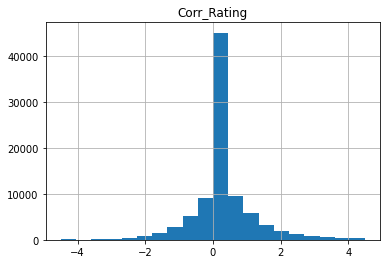

In [31]:
df8.hist(bins=20)

# Read csv files

In [20]:
imdb_train_df = pd.read_csv('/content/imdb_train.csv')

In [21]:
imdb_test_df = pd.read_csv('/content/imdb_test.csv')

In [22]:
imdb_unsup_df = pd.read_csv('/content/imdb_unsup.csv')

In [23]:
imdb_train_df

,Review,Rating,Sentiment
0,"Follow the Fleet, an RKO production in 1936, s...",8,1
1,"This is just a great, fun, lovely film. It cap...",10,1
2,"If you enjoy the subtle (yes, I said subtle) a...",10,1
3,I watched this film in a very strange way -- I...,7,1
4,people claim its edited funny but they had to ...,9,1
...,...,...,...
24995,.... And after seeing this pile of crap you wo...,2,0
24996,"I haven't seen ""Henry Fool"", but after watchin...",3,0
24997,I can clearly see now why Robin Hood flopped q...,3,0
24998,Home Alone 3 is one of my least favourite movi...,1,0


In [24]:
imdb_test_df

,Review,Rating,Sentiment
0,"Being a retired medical/health field ""toiler i...",9,1
1,This movie has a very deep look at the relatio...,8,1
2,<br /><br />Her Excellency Madam Shabana Azmi ...,10,1
3,Michelle Pfeiffer and Matthew Modine are a joy...,8,1
4,Tourist Trap is a genuinely spooky low-budget ...,10,1
...,...,...,...
24995,**Possible Spoilers Ahead**<br /><br />Wheneve...,1,0
24996,"With a name like ""10 Commandments"" you would e...",2,0
24997,"this film has no plot, no good acting, to be h...",1,0
24998,On the face of it this film looked like it mig...,2,0


In [25]:
imdb_unsup_df

,Review
0,Really dreadful piece of schlock. I can only i...
1,I believe this movie could incite in me the sa...
2,Here's a movie I wish I'd seen when I was 16: ...
3,"While not a big film, director Henry Koster ag..."
4,***SPOILER WARNING**** I do give away some plo...
...,...
49995,February 14 isn't any different from the many ...
49996,I've seen my fair share of putrid and insultin...
49997,"Wow, I love this short. This is about the best..."
49998,This movie didn't rate well with critics (some...


## Merge all labeled reviews

In [26]:
imdb_movie_review_labeled = pd.concat([imdb_train_df, imdb_test_df], axis=0, ignore_index=True)
imdb_movie_review_labeled.to_csv('imdb_sup.csv', index=False)

In [27]:
!rm imdb_train.csv
!rm imdb_test.csv

In [28]:
imdb_sup_df = pd.read_csv('/content/imdb_sup.csv')
imdb_sup_df

,Review,Rating,Sentiment
0,"Follow the Fleet, an RKO production in 1936, s...",8,1
1,"This is just a great, fun, lovely film. It cap...",10,1
2,"If you enjoy the subtle (yes, I said subtle) a...",10,1
3,I watched this film in a very strange way -- I...,7,1
4,people claim its edited funny but they had to ...,9,1
...,...,...,...
49995,**Possible Spoilers Ahead**<br /><br />Wheneve...,1,0
49996,"With a name like ""10 Commandments"" you would e...",2,0
49997,"this film has no plot, no good acting, to be h...",1,0
49998,On the face of it this film looked like it mig...,2,0


In [29]:
imdb_unsup_df = pd.read_csv('/content/imdb_unsup.csv')
imdb_unsup_df

,Review
0,Really dreadful piece of schlock. I can only i...
1,I believe this movie could incite in me the sa...
2,Here's a movie I wish I'd seen when I was 16: ...
3,"While not a big film, director Henry Koster ag..."
4,***SPOILER WARNING**** I do give away some plo...
...,...
49995,February 14 isn't any different from the many ...
49996,I've seen my fair share of putrid and insultin...
49997,"Wow, I love this short. This is about the best..."
49998,This movie didn't rate well with critics (some...





```
*   imdb_sup.csv
    Attributes:-
    Review: Movie Review 
    Rating: Rating out of 1-10 star
    Sentiment: 1 as Positive, 0 as Negative sentiment

*   imdb_unsup.csv (unlabeled reviews)
    Attributes:-
    Review: Movie Review

*   corr_ratings_tokens.csv (corresponding rating of tokens)
    Attributes:-
    Token: tokens from whole 100K reviews
    Corr_Rating: positive negative polarity values
```




